Token length of data

In [2]:
from util.data_reader import read_df
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from transformers import AutoTokenizer

def plot_token_legnths(df, tokenizer):
    # checking the distribution of review token lengths
    tok_no_pad = tokenizer(df['review_text'].tolist(), padding=False, truncation=True)
    n = [len(e.ids) for e in tok_no_pad[:]]

    dist = pd.Series(n).describe(percentiles=np.linspace(0.3, 1, 8, True))

    # drop the count
    plt.plot(dist[1:])
    return plt.show()

def tokenize(sentences, tokenizer):
    return tokenizer(
        sentences,
        add_special_tokens=True,
        return_tensors="pt",
        return_attention_mask=True,
        padding=True,
    )

df = read_df('test').dropna()
tokenizer = AutoTokenizer.from_pretrained('distilroberta-base')
tok_input = tokenize(df['review_text'].tolist(), tokenizer)
n_tokens = (tok_input['input_ids'] != 1).sum(axis=1)

/Users/aeirya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (1549 > 512). Running this sequence through the model will result in indexing errors


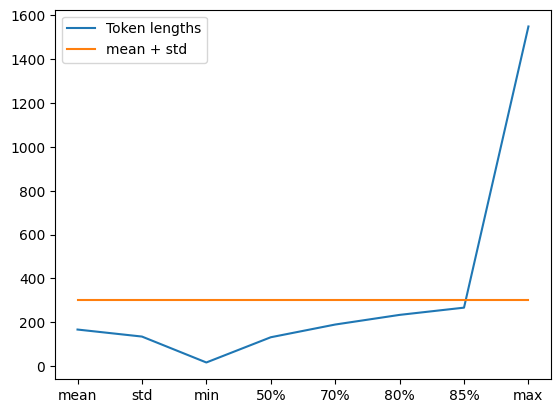

In [13]:
desc = pd.Series(n_tokens).describe(percentiles=[0.5, 0.7, 0.8, 0.85])[1:]
plt.plot(desc, label="Token lengths")
plt.plot(desc.keys(), [desc.iloc[0] + desc.iloc[1]]*len(desc), label="mean + std")
plt.legend(loc="upper left")
plt.show()